Pole Position: Predicting Final Position using Grid Position in Formula 1: A Linear Regression Application on discrete variables. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('results.csv', encoding="utf-8")

results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# this is to analyze how grid position influences final position
grid_cols = ['raceId', 'driverId', 'constructorId', 'grid', 'position']

grid_final = results[grid_cols]
grid_final.head()

,raceId,driverId,constructorId,grid,position
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5


In [9]:
grid_final = grid_final.copy()

# remove null values
grid_final.replace('\\N', np.nan, inplace=True)
grid_final.dropna(inplace=True)
#grid_final.head()

In [11]:
# Filter out rows where 'grid' or 'position' is zero
grid = grid_final[(grid_final['grid'] != 0) & (grid_final['position'] != 0)]

#grid.head()

In [14]:
grid = grid.copy()

In [15]:
print(grid['grid'].dtype)
grid['grid'] = grid['grid'].astype(int)
print(grid['grid'].dtype)

int64
int64


In [16]:
print(grid['position'].dtype)
grid['position'] = grid['position'].astype(int)
print(grid['position'].dtype)

object
int64


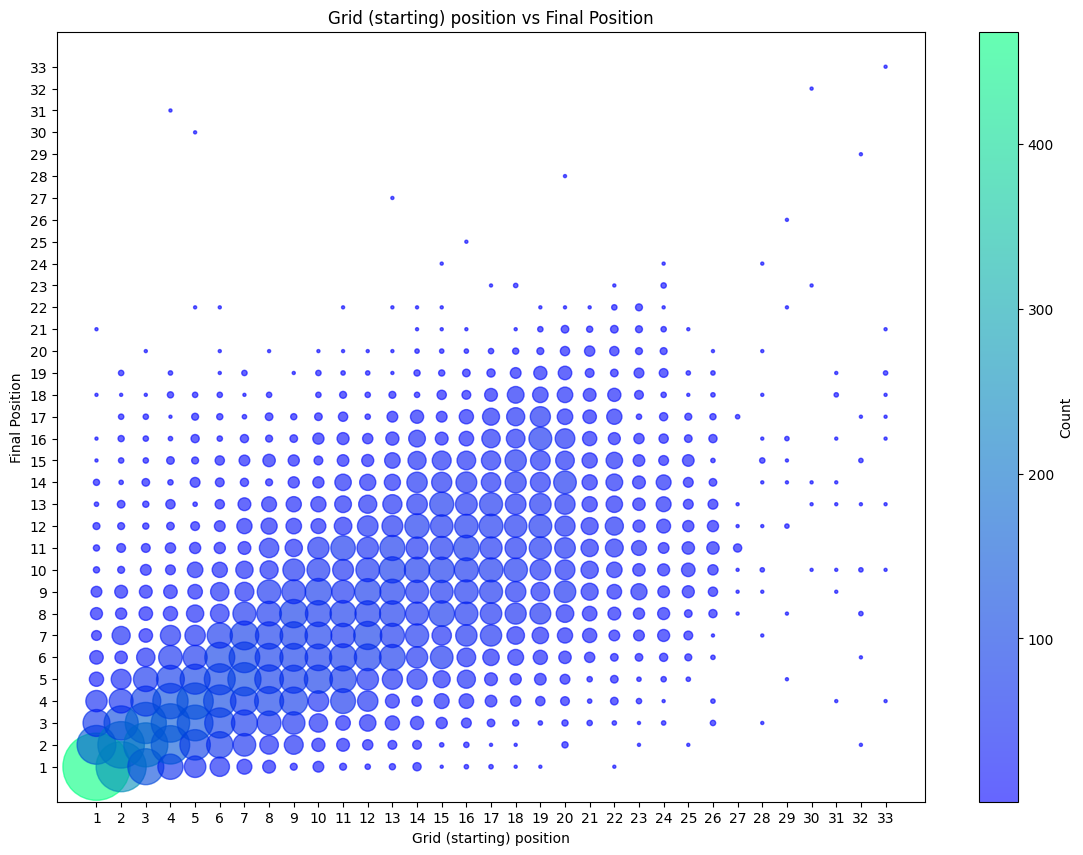

In [78]:
# Visualize
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Counting occurrences of each pair
df = pd.DataFrame({'X': grid['grid'], 'y': grid['position']})
counts = df.groupby(['X', 'y']).size().reset_index(name = 'counts')

# Plotting
size_scale = 5  # Adjust the size scale for visibility
norm = Normalize(vmin = counts['counts'].min(), vmax = counts['counts'].max())

plt.figure(figsize=(14, 10))
scatter = plt.scatter(counts['X'], counts['y'], s = counts['counts'] * size_scale, 
                    c = counts['counts'], cmap = 'winter', norm = norm, alpha = 0.6)

# Create colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Discrete axis with integers
plt.xticks(np.arange(min(counts['X']), max(counts['X'])+1, 1))
plt.yticks(np.arange(min(counts['y']), max(counts['y'])+1, 1))
plt.xlabel('Grid (starting) position')
plt.ylabel('Final Position')
plt.title('Grid (starting) position vs Final Position')
plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'my_data' is your DataFrame with 'GridPosition' and 'FinalPosition'
X = grid[['grid']] # Predictor
y = grid['position']  # Response

# Creating a linear regression model
model = LogisticRegression()
model.fit(X, y)

# Making predictions
grid['predicted_final_pos'] = np.exp(model.predict(X))

grid.head()

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,raceId,driverId,constructorId,grid,position,predicted_final_pos
0,18,1,1,1,1,2.718282
1,18,2,2,5,2,7.389056
2,18,3,3,7,3,54.598150
3,18,4,4,11,4,403.428793
4,18,5,1,3,5,7.389056


In [48]:
from scipy import stats

x = grid['grid'] # Predictor
y = grid['position']  # Response

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# To predict a new set of y values using the regression line
predicted_y = [slope * xi + intercept for xi in x]



Slope: 0.46654472242462663
Intercept: 2.7970136927556695
R-squared: 0.4236341408167415
P-value: 0.0
Standard error: 0.004407985902694191


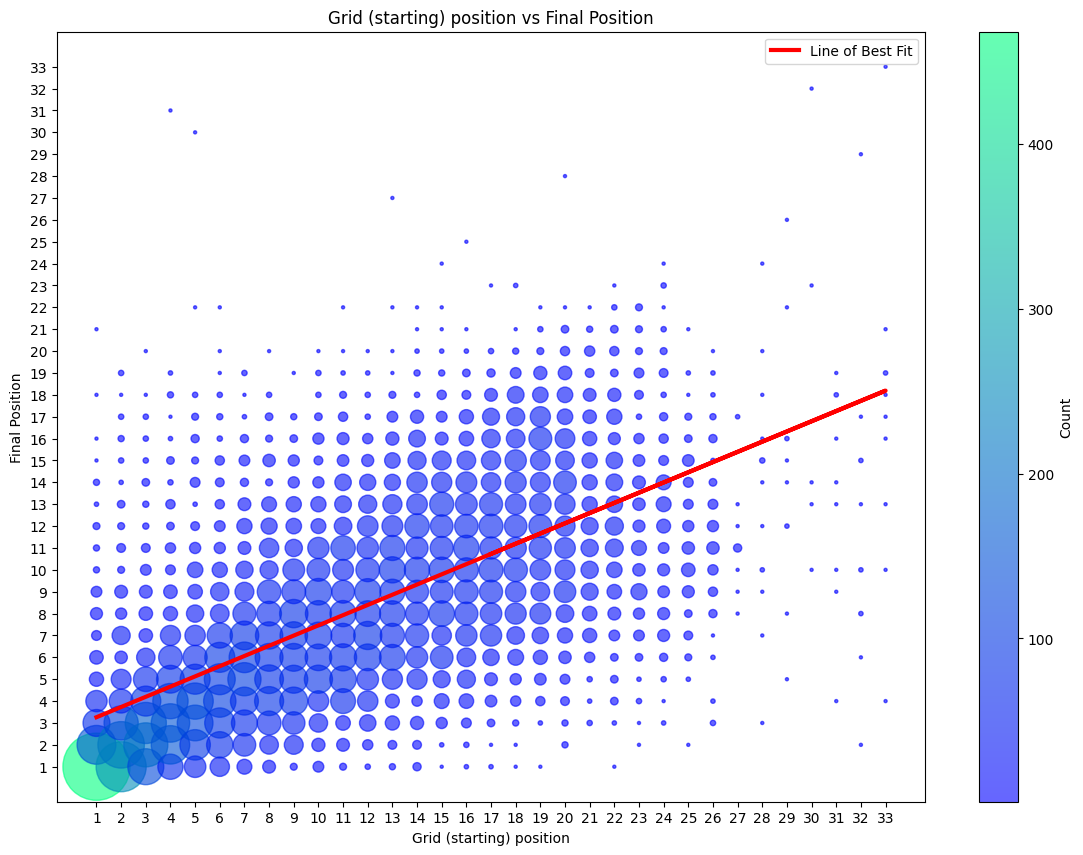

In [88]:
# Generate predicted y-values for each x-value using the slope and intercept
predicted_y = intercept + slope * x

plt.figure(figsize=(14, 10))
scatter = plt.scatter(counts['X'], counts['y'], s = counts['counts'] * size_scale, 
                    c = counts['counts'], cmap = 'winter', norm = norm, alpha = 0.6)

# Plot the line of best fit
plt.plot(x, predicted_y, color='red', label='Line of Best Fit', linewidth = 3)

# Create colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Count')

# Discrete axis with integers
plt.xticks(np.arange(min(counts['X']), max(counts['X'])+1, 1))
plt.yticks(np.arange(min(counts['y']), max(counts['y'])+1, 1))
plt.xlabel('Grid (starting) position')
plt.ylabel('Final Position')
plt.title('Grid (starting) position vs Final Position')
plt.legend()
plt.show()


In [84]:
whole = round(predicted_y, 0)
whole[0:10]

0      3.0
1      5.0
2      6.0
3      8.0
4      4.0
5      9.0
6     11.0
7     10.0
22     4.0
23     5.0
Name: grid, dtype: float64